<a href="https://colab.research.google.com/github/deinhacdomingos/MVPMachine/blob/main/PropostaTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Previsão de Sobrevivência do Titanic**

**Objetivo do projeto-** este projeto (ou MVP) tem como objetivo em prever se um passageiro sobreviveu ou não ao naufrágio do Titanic, utilizando características como por exemplo, idade, sexo, classe socieconômica, e outros atributos (ou features) fornecidos no dataset.

**Premissas:**
*   sexo, idade, classe socieconômica são fatores determinantes na probabilidade de sobrevivência.
*   A presença de familiares a bordo influencia as chances de sobrevivência.

**Convenções atribuídas:**
*   Features redundantes foram excluídos.
*   Dados ausentes foram preenchidos com a média.
*   A feature "Cabin" foi preenchida como "Desconhecida".


O dataset constitui das seguintes features:
*   "Survide" - variável que indica sobrevivência (Não=0, Sim=1).
*   "Pclass" - classe do passageiro (1ª, 2ª ou 3ª classe).
*   "Sex" - sexo (feminino ou masculino)
*   "Age" - idade do passageiro.
*   "SibSp" - número de irmãos/cônjuges a bordo.
*   "Parch" - número de pais/filhos a bordo.
*   "Fare" - Tarifa paga pelo passageiro
*   "Embarked" - porto de embarque (C, Q ou S).
*   "Cabin" foi descartada.
*   "Ticket" foi descartada.


# **1) Importando Bibliotecas Utilizadas**



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# **2) Importanto dados**

In [7]:
# Carregar os dados
url = "https://raw.githubusercontent.com/deinhacdomingos/MVPMachine/refs/heads/main/dataset/tested.csv"
data = pd.read_csv(url) # ler arquivo csv
data.head()                      # mostra as 5 primeiras linhas para obter a visão geral

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


***2.1) Análise de valores ausentes***

In [8]:
# Verificar valores ausentes
var_ausente = data.isnull().sum()
print('Valores ausentes por coluna:\n', var_ausente)

# Visualizar a porcentagem de valores ausentes
perc_perdida = (var_ausente / len(data)) * 100
print("\nPorcentagem de valores ausentes por coluna:\n", perc_perdida)

# Exibir os primeiros 5 registros do dataset para inspeção visual
data.head()

Valores ausentes por coluna:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Porcentagem de valores ausentes por coluna:
 PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


***2.2) Tratamento de valores ausentes***

In [9]:
# Valores ausentes na coluna 'Age'(idade) com a média
data['Age'].fillna(data['Age'].mean(), inplace=True)

# Valores ausentes na coluna 'Fare' (tarifa) com a média
data['Fare'].fillna(data['Fare'].mean(), inplace=True)

# Para a coluna 'Cabin', podemos descartá-la ou categorizar como "Desconhecida"
data['Cabin'].fillna('Desconhecida', inplace=True)

# Verifica novamente os valores ausentes
var_ausentes_depois = data.isnull().sum()
print("\nValores ausentes após o tratamento:\n", var_ausentes_depois)

# Codificar 'Sex' como 0 (masculino) e 1 (feminino)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Codificar 'Embarked'(embarcado) com valores numéricos: C = 0, Q = 1, S = 2
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Verificar as primeiras linhas após as transformações
data.head()


Valores ausentes após o tratamento:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


<ipython-input-9-99a16413e12b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)
<ipython-input-9-99a16413e12b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Desconhecida,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,Desconhecida,2
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Desconhecida,1
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,Desconhecida,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,Desconhecida,2


***2.3) Análise Exploratória de Dados***

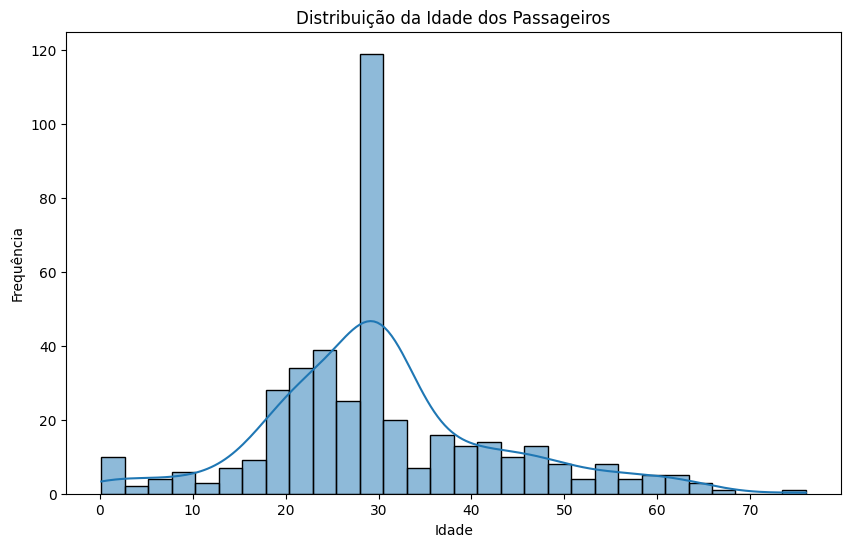

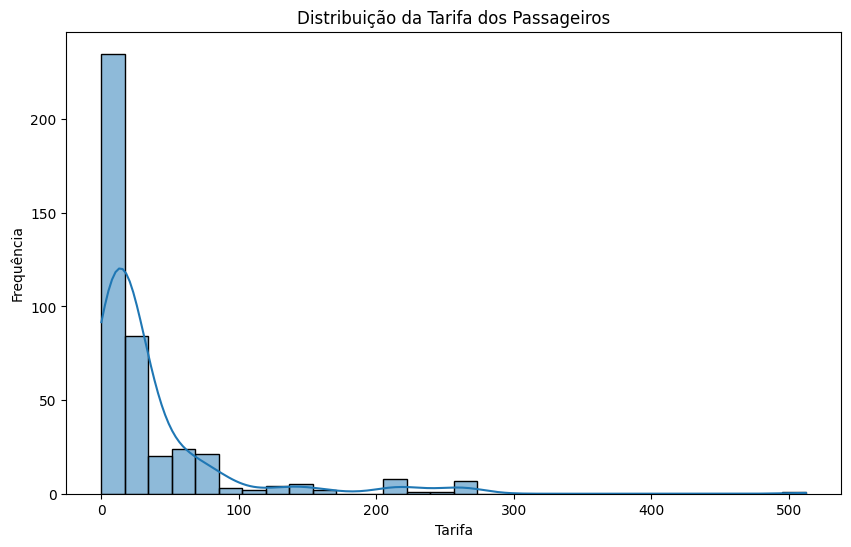

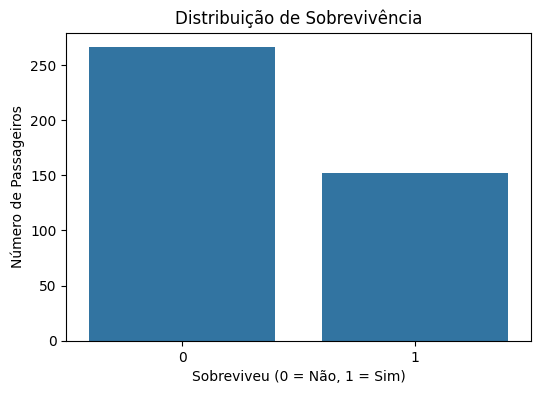

In [10]:
# Visualizar a distribuição de Idade
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Distribuição da Idade dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Visualizar a distribuição da Tarifa
plt.figure(figsize=(10,6))
sns.histplot(data['Fare'], kde=True, bins=30)
plt.title('Distribuição da Tarifa dos Passageiros')
plt.xlabel('Tarifa')
plt.ylabel('Frequência')
plt.show()

# Visualizar a distribuição da variável de sobrevivência
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=data)
plt.title('Distribuição de Sobrevivência')
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)')
plt.ylabel('Número de Passageiros')
plt.show()

# **3) Divisão dos dados em Treinamento e Teste**


O dataset foi dividido da seguinte forma:
*   80% para treinamento
*   20% para teste




In [11]:
from sklearn.model_selection import train_test_split

# Separar as variáveis independentes (X) e a variável dependente (y)
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']

# Dividir os dados em treinamento e teste (80% para treino, 20% para teste)
X_treina, X_teste, y_treina, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Tamanho do conjunto de treino: {X_treina.shape}')
print(f'Tamanho do conjunto de teste: {X_teste.shape}')

Tamanho do conjunto de treino: (334, 7)
Tamanho do conjunto de teste: (84, 7)


***3.1) Normalização dos dados***


*   Normalização das features para melhorar a performace do modelo.
*   Codificação de variáveis categóricos como "Sex" e o " Embarked" em valores numéricos.
*   Apenas as features mais relevantes foram utilizados no modelo, como: "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare" e "Embarked".

In [12]:
# Normalizar os dados
scaler = StandardScaler()
X_treina_escala = scaler.fit_transform(X_treina)
X_teste_escala = scaler.transform(X_teste)

***3.2) Treinamento do Modelo***


*   A escolha do " Random Forest" foi pela eficácia em problemas de classificação binária e lida bem com dados numéricos e categóricos,ou seja, dados mistos.
*   O modelo foi treinado com 100 estimadores(árvores) e uma semente fixa para reprodutibilidade.
*   O modelo apresentou boa acurácia no conjunto de teste.

In [13]:
# Inicializar o modelo de Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo
modelo.fit(X_treina_escala, y_treina)

# Prever as saídas no conjunto de teste
y_pred = modelo.predict(X_teste_escala)

***3.2) Avaliação do Modelo***


As métricas a seguir foram utilizadas na avaliação:
*   Acurácia - usada para medir a porcentagem de previsões corretas.
*   Matriz de confusão - mostra erros e acertos por classe
*   Relatório de classificação- Inclui precisão, recall e F1-score, oferecendo uma visão mais completa do desempenho do modelo.

In [14]:
# Calcular a acurácia
acurária = accuracy_score(y_teste, y_pred)
print(f'Acurácia do Modelo: {acurária:.4f}')

# Matriz de Confusão
matriz_conf= confusion_matrix(y_teste, y_pred)
print("\nMatriz de Confusão:")
print(matriz_conf)

# Relatório de Classificação (precisão, recall, F1-score)
class_report = classification_report(y_teste, y_pred)
print("\nRelatório de Classificação:")
print(class_report)

Acurácia do Modelo: 1.0000

Matriz de Confusão:
[[50  0]
 [ 0 34]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



***3.3) Visualização da Matriz de Confusão***

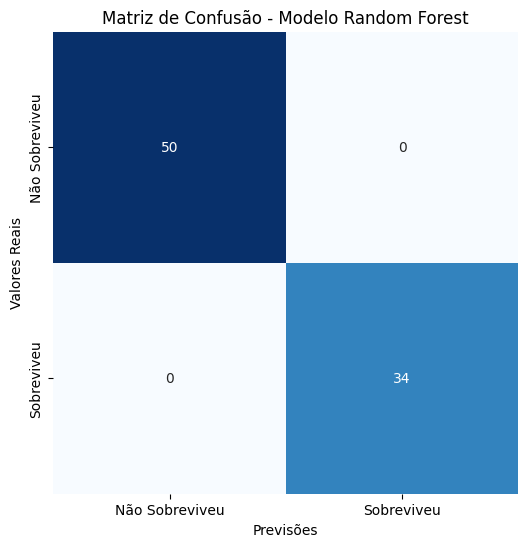

In [15]:
# Visualização da Matriz de Confusão
plt.figure(figsize=(6,6))
sns.heatmap(matriz_conf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Não Sobreviveu', 'Sobreviveu'], yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão - Modelo Random Forest')
plt.show()

Resultados Obtidos:
*   O modelo apresentou uma boa acurácia, com métricas de classificação consistente.
*   Não parece haver overfitting, dado que os resultados em teste não são significativamente inferiores aos do treino.
*   Apenas o Random Forest foi testado. Comparar com outros modelos  poderia ser útil para identificar a melhor abordagem.
*   O modelo Random Forest com 100 árvores apresentou resultados satisfatórios e uma matriz de confusão equilibrada, sendo adequado para o problema.



